# Linear and Polynomial Regression

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Loading dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLCourse/Fish.csv')

In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df_new = df[df['Species'] == 'Bream']
df_new = df_new[['Height', 'Weight']]

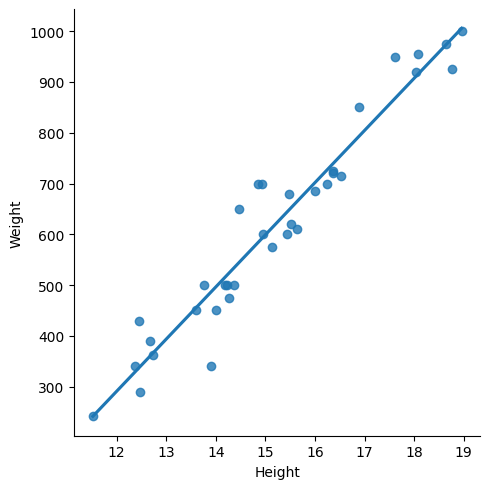

In [ ]:
sns.lmplot(x ="Height", y ="Weight", data = df_new, order = 1, ci = None)

In [ ]:
X = np.array(df_new['Height']).reshape(-1, 1)
y = np.array(df_new['Weight']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regr.score(X_test, y_test)) #r^2

0.9582901946926833


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(regr, X, y, cv=5, scoring='r2')

array([ 0.75202054, -0.52033371, -1.98632287,  0.11391592, -0.77974297])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)

In [ ]:
poly_features = poly.fit_transform(X)
poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.fit_transform(X_test)

In [ ]:
regr.fit(poly_features_train, y_train)

LinearRegression()

In [ ]:
print(regr.score(poly_features_test, y_test))

0.9561528572437663


In [ ]:
cross_val_score(regr, poly_features, y, cv=5, scoring='r2')

array([ 0.72069742, -0.56577597, -2.33690644,  0.09223328, -1.67255514])

# Logistic Regression

In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
df_cl = df[(df.Species == 'Bream') | (df.Species == 'Pike')]

In [ ]:
df_cl.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = np.array(df_cl[['Height','Width', 'Weight']]).reshape(-1, 3)
y = np.array((df_cl['Species']=='Bream').astype(int)).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
logi = LogisticRegression()
logi.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = logi.predict(X_test)

In [ ]:
print(classification_report(y_pred, y_test, target_names=['Bream', 'Pike']))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         7
        Pike       1.00      1.00      1.00         6

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_pred, y_test))

[[7 0]
 [0 6]]


<Axes: >

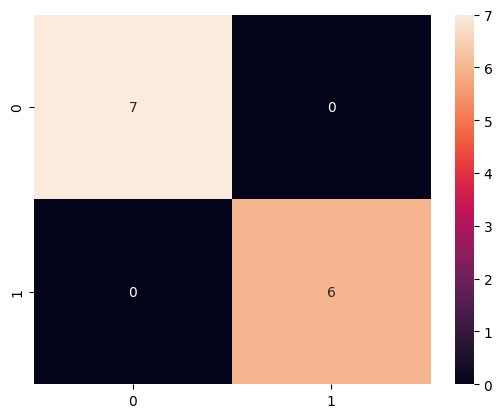

In [ ]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# degreeint, default=3

scv = SVC(kernel='rbf')
scv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred = scv.predict(X_test)
print(classification_report(y_pred, y_test, target_names=['Bream', 'Pike']))

              precision    recall  f1-score   support

       Bream       0.14      1.00      0.25         1
        Pike       1.00      0.50      0.67        12

    accuracy                           0.54        13
   macro avg       0.57      0.75      0.46        13
weighted avg       0.93      0.54      0.63        13



In [ ]:
from sklearn.svm import SVR # For regression tasks

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=50)
clf3 = SVC()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(n_estimators=50)),
                             ('gnb', SVC())])

In [ ]:
y_pred = eclf.predict(X_test)
print(classification_report(y_pred, y_test, target_names=['Bream', 'Pike']))

              precision    recall  f1-score   support

       Bream       0.86      1.00      0.92         6
        Pike       1.00      0.86      0.92         7

    accuracy                           0.92        13
   macro avg       0.93      0.93      0.92        13
weighted avg       0.93      0.92      0.92        13



## Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [ ]:
model = Sequential(
    [               
        tf.keras.layers.InputLayer((3,)),
        tf.keras.layers.Dense(25, activation=relu, name="L1"),
        tf.keras.layers.Dense(15, activation=relu, name="L2"),
        tf.keras.layers.Dense(1, activation=sigmoid, name="L3")
    ], name = "NeuralNetwork" 
)

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
)

In [ ]:
history = model.fit(X_test, y_test, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906
Epoch 2/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.6906
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.6906
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.6906
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6906
Epoch 7/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6906
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6906
Epoch 10/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906
Epoch 11/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6906
Epoch 12/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.6906
Epoch 13/1000
1/1 [==================

In [ ]:
history.history

{'loss': [0.6905871033668518,
  0.6905850768089294,
  0.6905831098556519,
  0.6905810832977295,
  0.6905791759490967,
  0.6905771493911743,
  0.6905752420425415,
  0.6905733346939087,
  0.6905714273452759,
  0.6905694603919983,
  0.6905674338340759,
  0.6905656456947327,
  0.6905637383460999,
  0.6905618906021118,
  0.690559983253479,
  0.6905580759048462,
  0.6905562877655029,
  0.6905544996261597,
  0.6905526518821716,
  0.6905508041381836,
  0.6905489563941956,
  0.6905471086502075,
  0.6905453205108643,
  0.690543532371521,
  0.6905418038368225,
  0.6905400156974792,
  0.6905382871627808,
  0.6905364990234375,
  0.6905347108840942,
  0.6905329823493958,
  0.6905311942100525,
  0.6905295848846436,
  0.6905279159545898,
  0.6905260682106018,
  0.6905243992805481,
  0.6905227899551392,
  0.6905211210250854,
  0.690519392490387,
  0.6905177235603333,
  0.6905161142349243,
  0.6905145049095154,
  0.6905128955841064,
  0.6905111074447632,
  0.690509557723999,
  0.6905080080032349,
  0.69

In [ ]:
import matplotlib.pyplot as plt

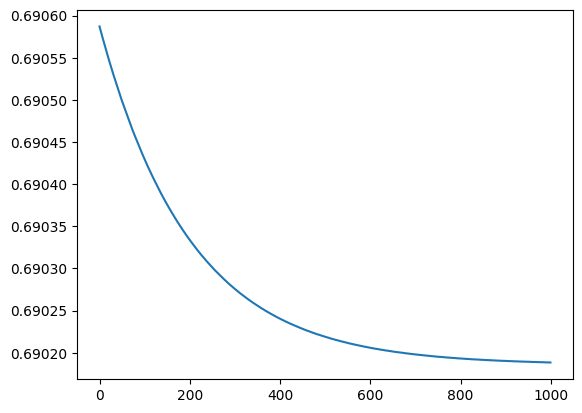

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
prediction = model.predict(X_test)
prediction = (prediction > 0.5).astype(int)

1/1 [==============================] - 0s 160ms/step


In [ ]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.00      0.00      0.00         0

    accuracy                           0.54        13
   macro avg       0.50      0.27      0.35        13
weighted avg       1.00      0.54      0.70        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
